In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("diabetes.csv", delimiter=',')

print(data.head())
print(data.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [3]:
import plotly.express as px

In [4]:
px.scatter_3d(data,x= 'BloodPressure',y='BMI',z='Age',opacity=.5 )

In [5]:
dataset= np.genfromtxt("diabetes.csv",delimiter=',',skip_header=True,usecols=(2,5,7))
np.set_printoptions(formatter={'float':'{: 0.1f}'.format})

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(1,input_dim= 2,activation='linear'))

In [8]:
model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

In [9]:
history= model.fit(x= dataset[:,0:2],y= dataset[:,2],epochs=2000,batch_size=32,verbose=1)

Epoch 1/2000
24/24 [==============================] - 0s 780us/step - loss: 12847.5459 - mse: 12847.5459
Epoch 2/2000
24/24 [==============================] - 0s 824us/step - loss: 12241.5947 - mse: 12241.5947
Epoch 3/2000
24/24 [==============================] - 0s 1ms/step - loss: 11699.4717 - mse: 11699.4717
Epoch 4/2000
24/24 [==============================] - 0s 1ms/step - loss: 11172.1055 - mse: 11172.1055
Epoch 5/2000
24/24 [==============================] - 0s 1ms/step - loss: 10657.4082 - mse: 10657.4082
Epoch 6/2000
24/24 [==============================] - 0s 2ms/step - loss: 10159.9736 - mse: 10159.9736
Epoch 7/2000
24/24 [==============================] - 0s 1ms/step - loss: 9672.2676 - mse: 9672.2676
Epoch 8/2000
24/24 [==============================] - 0s 1ms/step - loss: 9193.0742 - mse: 9193.0742
Epoch 9/2000
24/24 [==============================] - 0s 954us/step - loss: 8727.6592 - mse: 8727.6592
Epoch 10/2000
24/24 [==============================] - 0s 1ms/step - loss

In [14]:
predictions= model.predict(dataset[:,0:2])

In [15]:
print(predictions[:5,:2].T)

[[ 33.7  31.6  30.7  31.8  28.3]]


In [16]:
true_ages = dataset[:,2]

In [19]:
diff= abs(true_ages-predictions.flatten())
print(diff[:5])

[ 16.3  0.6  1.3  10.8  4.7]


# compare true vs predictions

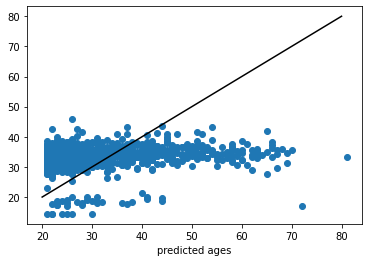

In [33]:
plt.scatter(true_ages,predictions.flatten())
plt.xlabel("true ages")
plt.xlabel("predicted ages")
plt.plot([20,80],[20,80],c='black')

In [35]:
w0 = model.layers[0].get_weights()[0][0]
w1 = model.layers[0].get_weights()[0][1]
b0 = model.layers[0].get_weights()[1]
print(w0,w1,b0)

[ 0.2] [ 0.1] [ 14.4]


In [36]:
my_predictions= dataset[:,0]*w0 + dataset[:,1]*w1 +b0
print(my_predictions[:5])

[ 33.7  31.6  30.7  31.8  28.3]
